In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/x_train.txt", sep=" ", header=None)
print(df.head())
print(df.shape)

y = pd.read_csv("data/y_train.txt", sep=" ", header=None)
y = np.array(y).ravel()
print(y[:5])
print(y.shape)

df_test = pd.read_csv("data/x_test.txt", sep=" ", header=None)
print(df_test.head())
print(df_test.shape)

         0          1          2          3          4          5    \
0  20.454647  16.739345  39.811892  24.955468  27.088535  17.116793   
1  16.175225  10.483281  27.471017  18.509824  19.045353  15.039082   
2  10.577212  10.795115  24.621388  17.264747  14.221610   8.754692   
3  26.299206  13.471215  51.725934  40.786947  26.052414  33.200702   
4  23.193955  20.037969  37.780290  28.983748  25.510508  15.970348   

         6          7          8          9    ...        490        491  \
0  25.166957  23.364508  17.223886  18.339175  ...  13.235314   5.160379   
1  21.354915  15.790575  13.912508  13.772518  ...  13.355832   2.609716   
2  18.399259  11.358798  15.432650  14.842153  ...  15.179359  10.200144   
3  51.014330  27.685009  33.107991  25.359457  ...   7.693654   6.359187   
4  27.930757  20.707354  25.341768  27.118987  ...   7.068407   7.180632   

         492        493        494        495        496        497  \
0  29.194846  17.298314   6.414267   7.780568

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)

## Random forest

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.696

In [14]:
importances = rf.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

features = np.array(feature_importance_df.feature)

     feature  importance
2          2    0.087630
3          3    0.078095
6          6    0.055298
8          8    0.048771
5          5    0.045550
..       ...         ...
120      120    0.000040
69        69    0.000000
395      395    0.000000
212      212    0.000000
284      284    0.000000

[500 rows x 2 columns]


In [18]:
results = []
n_features = np.arange(1, len(features) + 1)

for i in n_features:
    selected_features = features[:i]
    X_train_filtered = X_train.iloc[:, selected_features]
    X_test_filtered = X_test.iloc[:, selected_features]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
    rf.fit(X_train_filtered, y_train)
    pred = rf.predict(X_test_filtered)
    acc = accuracy_score(y_test, pred)

    results.append(acc)

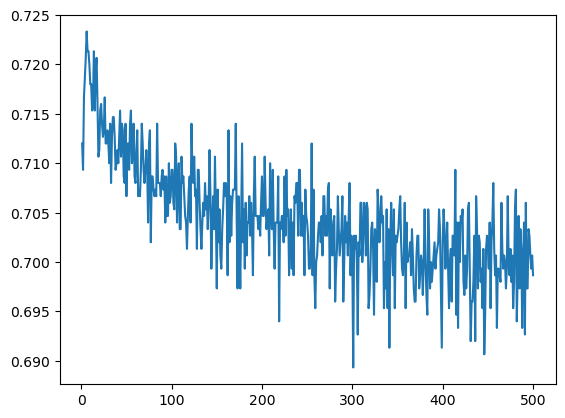

In [19]:
plt.plot(n_features, results)
plt.show()

In [20]:
print(np.max(results))
print(np.argmax(results))

0.7233333333333334
5


## XGBoost

In [21]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
accuracy_score(y_test, pred)

0.6813333333333333

In [22]:
importances = xgb.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

features = np.array(feature_importance_df.feature)

     feature  importance
2          2    0.022566
376      376    0.009113
4          4    0.006247
288      288    0.005461
202      202    0.005405
..       ...         ...
316      316    0.000000
305      305    0.000000
299      299    0.000000
297      297    0.000000
133      133    0.000000

[500 rows x 2 columns]


In [23]:
results = []
n_features = np.arange(1, len(features) + 1)

for i in n_features:
    selected_features = features[:i]
    X_train_filtered = X_train.iloc[:, selected_features]
    X_test_filtered = X_test.iloc[:, selected_features]
    
    xgb = XGBClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
    xgb.fit(X_train_filtered, y_train)
    pred = xgb.predict(X_test_filtered)
    acc = accuracy_score(y_test, pred)

    results.append(acc)

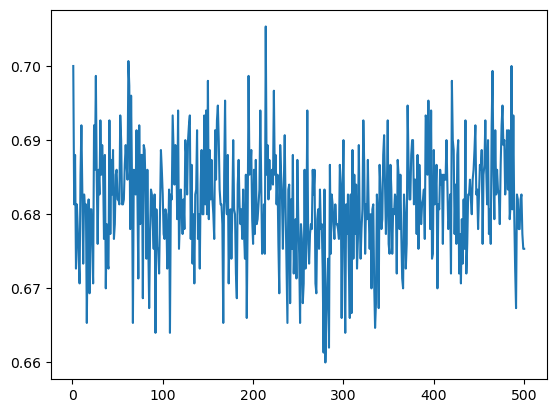

In [24]:
plt.plot(n_features, results)
plt.show()

In [25]:
print(np.max(results))
print(np.argmax(results))

0.7053333333333334
213


In [37]:
pred = xgb.predict(df_test.iloc[:, selected_features])
# number of ones
# pred(len(np.where(pred == 1)))
len(np.where(pred == 1)[0])

2460